In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image

# from gmm_ot import *
from src.patch import *
from src.gaussian_texture import *
import src.semidiscrete_ot as sdot


# Load input image
im0 = np.double(plt.imread('tex/ground1013_small.png'))
m,n,nc=im0.shape

import src.texto as texto

model_moy = texto.model(im0, 3, 4, 4,mode="RANDOMPATCH")   
model_weight = texto.model(im0, 3, 4, 4,mode="RANDOMPATCH",recomp_weight=True)   

Processing scale 3
Estimate target measure with 900 points
Compute semi-discrete optimal transport
Processing scale 2
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 1
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 0
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Elapsed time :  36.34919571876526  seconds
Processing scale 3
Estimate target measure with 900 points
Compute semi-discrete optimal transport
Processing scale 2
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 1
Estimate Source GMM with 4 components
Estimate target measure with 1000 points
Compute semi-discrete optimal transport
Processing scale 0
Estimate Source GMM with 4 components
Estimate tar

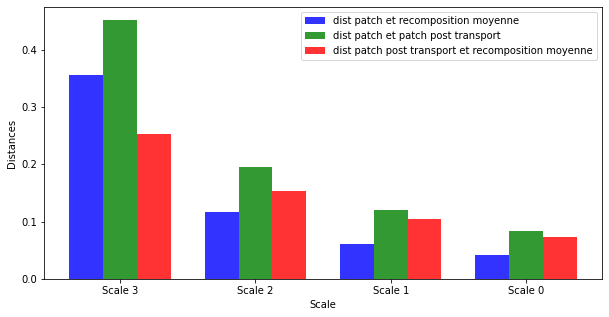

In [6]:
dist_X_R_Z_moy = model_moy.dist_X_R_Z
dist_X_TvX_moy = model_moy.dist_X_TvX
dist_Z_R_Z_moy = model_moy.dist_Z_R_Z

# plot distances on same plot
fig, ax = plt.subplots(figsize=(10, 5))
n_groups = len(dist_X_R_Z_moy)
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, dist_X_R_Z_moy, bar_width, alpha=opacity, color='b', label='dist patch et recomposition moyenne')
rects2 = plt.bar(index + bar_width, dist_X_TvX_moy, bar_width, alpha=opacity, color='g', label='dist patch et patch post transport')
rects3 = plt.bar(index + 2*bar_width, dist_Z_R_Z_moy, bar_width, alpha=opacity, color='r', label='dist patch post transport et recomposition moyenne')

plt.xlabel('Scale')
plt.ylabel('Distances')
plt.xticks(index + bar_width, (f'Scale {i}' for i in reversed(range(0, n_groups))))
plt.legend()
# Question: interprétation difficile

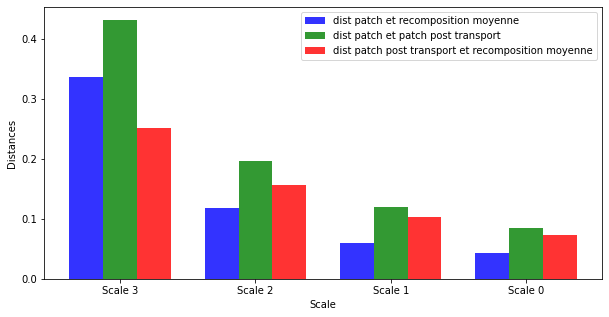

In [7]:
dist_X_R_Z_w = model_weight.dist_X_R_Z
dist_X_TvX_w = model_weight.dist_X_TvX
dist_Z_R_Z_w = model_weight.dist_Z_R_Z

# plot distances on same plot
fig, ax = plt.subplots(figsize=(10, 5))
n_groups = len(dist_X_R_Z_w)
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, dist_X_R_Z_w, bar_width, alpha=opacity, color='b', label='dist patch et recomposition moyenne')
rects2 = plt.bar(index + bar_width, dist_X_TvX_w, bar_width, alpha=opacity, color='g', label='dist patch et patch post transport')
rects3 = plt.bar(index + 2*bar_width, dist_Z_R_Z_w, bar_width, alpha=opacity, color='r', label='dist patch post transport et recomposition moyenne')

plt.xlabel('Scale')
plt.ylabel('Distances')
plt.xticks(index + bar_width, (f'Scale {i}' for i in reversed(range(0, n_groups))))
plt.legend()
# MOYENNE PONDÉRÉE PAR COUT

In [13]:
weights_costs = model_weight.couts

In [3]:
def display_patches(patches):
    # Assuming patches is of shape (N, 27)
    N = patches.shape[0]
    
    # Determine the size of the grid needed
    patch_side = int(np.ceil(np.sqrt(N)))

    # Total number of elements in the grid
    total_patches = patch_side**2

    # Number of padding elements needed
    padding_patches = total_patches - N

    if padding_patches > 0:
        # Create black patches for padding
        black_patch = np.ones((padding_patches, 27))

        # Append black patches to the original patches
        patches = np.vstack((patches, black_patch))

    # Reshape each patch to 3x3x3
    reshaped_patches = patches.reshape(-1, 3, 3, 3)

    # Initialize an empty array for the final image
    display_image = np.zeros((patch_side * 3, patch_side * 3, 3))

    # Fill the display image with patches
    for i in range(patch_side):
        for j in range(patch_side):
            display_image[i*3:(i+1)*3, j*3:(j+1)*3, :] = reshaped_patches[i*patch_side + j]

    plt.imshow(np.clip(display_image,0,1))

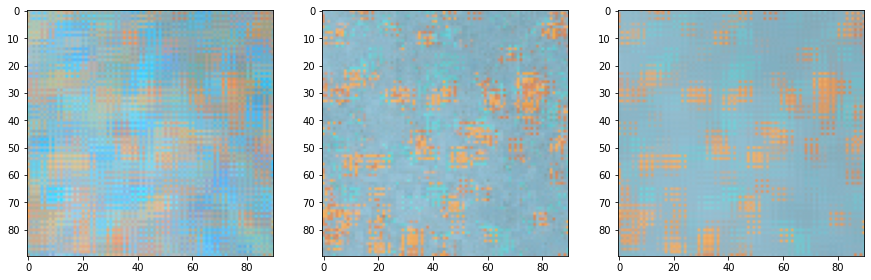

In [7]:
# plt.figure()
# display_patches(model.patches_before_transport[0])
# plt.figure()
# display_patches(model.patches_after_transport[0])
# plt.figure()
# display_patches(model.patches_after_recomp[0])

# do it in a subplot side by side
plt.figure(figsize=(15,5))
plt.subplot(131)
display_patches(model.patches_before_transport[0])
plt.subplot(132)
display_patches(model.patches_after_transport[0])
plt.subplot(133)
display_patches(model.patches_after_recomp[0])